In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools

In [2]:
df0 = pd.read_csv('sp500_closefull.csv', index_col=0, parse_dates=True)
df0.dropna(axis=0, how='all', inplace=True)
df0.dropna(axis=1, how='any', inplace=True)

In [3]:
df0.head()

,CSCO,UAL,TROW,ISRG,PRGO,TPR,DVN,MRO,BA,VRTX,...,M,CRM,PGR,WAT,BWA,LRCX,NWL,UAA,BLK,PPL
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,24.690001,12.80,54.400002,102.923332,40.349998,36.310001,76.570000,19.153616,56.180000,44.240002,...,17.059999,18.705000,18.030001,61.630001,16.889999,39.880001,15.20,3.51000,238.580002,30.242558
2010-01-05,24.580000,13.91,55.009998,102.459999,38.790001,36.750000,76.650002,19.171511,58.020000,42.779999,...,16.860001,18.625000,17.969999,60.790001,17.695000,39.610001,15.11,3.61500,239.610001,29.851370
2010-01-06,24.420000,13.27,54.150002,103.946663,38.299999,37.470001,76.419998,19.595024,59.779999,42.029999,...,17.100000,18.592501,17.790001,60.900002,18.344999,39.430000,15.38,3.69500,234.669998,29.916569
2010-01-07,24.530001,13.55,54.110001,103.556664,37.990002,37.490002,75.970001,19.475725,62.200001,41.500000,...,17.490000,18.510000,17.549999,61.160000,18.594999,39.360001,15.82,3.65125,237.250000,29.627834
2010-01-08,24.660000,13.33,53.900002,102.986664,37.779999,37.270000,76.120003,19.505550,61.599998,40.669998,...,16.920000,18.537500,17.709999,61.209999,18.254999,40.349998,15.77,3.64375,238.919998,29.534695


In [4]:
df_returns = pd.DataFrame()
for name in df0.columns:
  df_returns[name] = np.log(df0[name]).diff()

In [5]:
df_returns.head()

,CSCO,UAL,TROW,ISRG,PRGO,TPR,DVN,MRO,BA,VRTX,...,M,CRM,PGR,WAT,BWA,LRCX,NWL,UAA,BLK,PPL
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,-0.004465,0.083163,0.011151,-0.004512,-0.039429,0.012045,0.001044,0.000934,0.032227,-0.033559,...,-0.011793,-0.004286,-0.003333,-0.013723,0.046560,-0.006793,-0.005939,0.029476,0.004308,-0.013019
2010-01-06,-0.006531,-0.047102,-0.015757,0.014405,-0.012713,0.019402,-0.003005,0.021850,0.029883,-0.017687,...,0.014134,-0.001746,-0.010067,0.001808,0.036075,-0.004555,0.017711,0.021889,-0.020832,0.002182
2010-01-07,0.004494,0.020881,-0.000739,-0.003759,-0.008127,0.000534,-0.005906,-0.006107,0.039684,-0.012690,...,0.022551,-0.004447,-0.013583,0.004260,0.013536,-0.001777,0.028207,-0.011911,0.010934,-0.009698
2010-01-08,0.005286,-0.016369,-0.003889,-0.005519,-0.005543,-0.005886,0.001973,0.001530,-0.009693,-0.020203,...,-0.033133,0.001485,0.009075,0.000817,-0.018454,0.024841,-0.003166,-0.002056,0.007014,-0.003149


In [6]:
# split into train and test
Ntest = 1000
train_data = df_returns.iloc[:-Ntest]
test_data = df_returns.iloc[-Ntest:]

In [7]:
feats = ['AAPL', 'MSFT', 'AMZN']

In [8]:
class Env:
  def __init__(self, df):
    self.df = df
    self.n = len(df)
    self.current_idx = 0
    self.action_space = [0, 1, 2] # BUY, SELL, HOLD
    self.invested = 0

    self.states = self.df[feats].to_numpy()
    self.rewards = self.df['SPY'].to_numpy()

  def reset(self):
    self.current_idx = 0
    return self.states[self.current_idx]

  def step(self, action):
    # need to return (next_state, reward, done)

    self.current_idx += 1
    if self.current_idx >= self.n:
      raise Exception("Episode already done")

    if action == 0: # BUY
      self.invested = 1
    elif action == 1: # SELL
      self.invested = 0
    
    # compute reward
    if self.invested:
      reward = self.rewards[self.current_idx]
    else:
      reward = 0

    # state transition
    next_state = self.states[self.current_idx]

    done = (self.current_idx == self.n - 1)
    return next_state, reward, done

In [9]:
class StateMapper:
  def __init__(self, env, n_bins=6, n_samples=10000):
    # first, collect sample states from the environment
    states = []
    done = False
    s = env.reset()
    self.D = len(s) # number of elements we need to bin
    states.append(s)
    while True:
      a = np.random.choice(env.action_space)
      s2, _, done = env.step(a)
      states.append(s2)
      if len(states) >= n_samples:
        break
      if done:
        s = env.reset()
        states.append(s)
        if len(states) >= n_samples:
          break

    # convert to numpy array for easy indexing
    states = np.array(states)

    # create the bins for each dimension
    self.bins = []
    for d in range(self.D):
      column = np.sort(states[:,d])

      # find the boundaries for each bin
      current_bin = []
      for k in range(n_bins):
        boundary = column[int(n_samples / n_bins * (k + 0.5))]
        current_bin.append(boundary)

      self.bins.append(current_bin)


  def transform(self, state):
    x = np.zeros(self.D)
    for d in range(self.D):
      x[d] = int(np.digitize(state[d], self.bins[d]))
    return tuple(x)


  def all_possible_states(self):
    list_of_bins = []
    for d in range(self.D):
      list_of_bins.append(list(range(len(self.bins[d]) + 1)))
    # print(list_of_bins)
    return itertools.product(*list_of_bins)

In [10]:
class Agent:
  def __init__(self, action_size, state_mapper):
    self.action_size = action_size
    self.gamma = 0.8  # discount rate
    self.epsilon = 0.1
    self.learning_rate = 1e-1
    self.state_mapper = state_mapper

    # initialize Q-table randomly
    self.Q = {}
    for s in self.state_mapper.all_possible_states():
      s = tuple(s)
      for a in range(self.action_size):
        self.Q[(s,a)] = np.random.randn()

  def act(self, state):
    if np.random.rand() <= self.epsilon:
      return np.random.choice(self.action_size)

    s = self.state_mapper.transform(state)
    act_values = [self.Q[(s,a)] for a in range(self.action_size)]
    return np.argmax(act_values)  # returns action

  def train(self, state, action, reward, next_state, done):
    s = self.state_mapper.transform(state)
    s2 = self.state_mapper.transform(next_state)

    if done:
      target = reward
    else:
      act_values = [self.Q[(s2,a)] for a in range(self.action_size)]
      target = reward + self.gamma * np.amax(act_values)

    # Run one training step
    self.Q[(s,action)] += self.learning_rate * (target - self.Q[(s,action)])

In [11]:
def play_one_episode(agent, env, is_train):
  state = env.reset()
  done = False
  total_reward = 0

  while not done:
    action = agent.act(state)
    next_state, reward, done = env.step(action)
    total_reward += reward
    if is_train:
      agent.train(state, action, reward, next_state, done)
    state = next_state

  return total_reward

In [12]:
num_episodes = 500

In [13]:
train_env = Env(train_data)
test_env = Env(test_data)

In [14]:
action_size = len(train_env.action_space)
state_mapper = StateMapper(train_env)
agent = Agent(action_size, state_mapper)

In [15]:
train_rewards = np.empty(num_episodes)
test_rewards = np.empty(num_episodes)

In [16]:
for e in range(num_episodes):
  r = play_one_episode(agent, train_env, is_train=True)
  train_rewards[e] = r

  # test on the test set
  tmp_epsilon = agent.epsilon
  agent.epsilon = 0.
  tr = play_one_episode(agent, test_env, is_train=False)
  agent.epsilon = tmp_epsilon
  test_rewards[e] = tr

  print(f"eps: {e + 1}/{num_episodes}, train: {r:.5f}, test: {tr:.5f}")

eps: 1/500, train: 0.46131, test: 0.12650
eps: 2/500, train: 0.35321, test: 0.20074
eps: 3/500, train: 0.29321, test: 0.11254
eps: 4/500, train: 0.40163, test: 0.08997
eps: 5/500, train: 0.42352, test: -0.00403
eps: 6/500, train: 0.37334, test: 0.04149
eps: 7/500, train: 0.51148, test: 0.21572
eps: 8/500, train: 0.35521, test: 0.21114
eps: 9/500, train: 0.44560, test: 0.12298
eps: 10/500, train: 0.36198, test: 0.08451
eps: 11/500, train: 0.54691, test: 0.19121
eps: 12/500, train: 0.58657, test: 0.08661
eps: 13/500, train: 0.37891, test: -0.06881
eps: 14/500, train: 0.36774, test: 0.19776
eps: 15/500, train: 0.44758, test: 0.03896
eps: 16/500, train: 0.37587, test: 0.07421
eps: 17/500, train: 0.54824, test: 0.06861
eps: 18/500, train: 0.52168, test: 0.16991
eps: 19/500, train: 0.55957, test: 0.09352
eps: 20/500, train: 0.54301, test: 0.09152
eps: 21/500, train: 0.46026, test: 0.10183
eps: 22/500, train: 0.66095, test: 0.15645
eps: 23/500, train: 0.54787, test: 0.04425
eps: 24/500, train

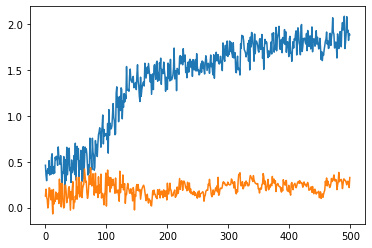

In [17]:
plt.plot(train_rewards)
plt.plot(test_rewards);